In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
unemployed_rate=pd.read_csv("data/new/Unemployed_rate.csv",encoding="utf-8")
unemployed_rate.head()

,Date,Unemplyed rate,The youth unemplyed rate
0,2015-01,3.5,9.3
1,2015-02,3.6,9.5
2,2015-03,3.5,9.3
3,2015-04,3.6,9.1
4,2015-05,3.7,9.3


In [3]:
unemployed_rate.shape

(112, 3)

In [4]:
unemployed_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      112 non-null    object 
 1   Unemplyed rate            112 non-null    float64
 2   The youth unemplyed rate  112 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


In [6]:
unemployed_rate.dtypes

Date                         object
Unemplyed rate              float64
The youth unemplyed rate    float64
dtype: object

In [8]:
#날짜 형식 변경
unemployed_rate['Date'] = pd.to_datetime(unemployed_rate['Date'])

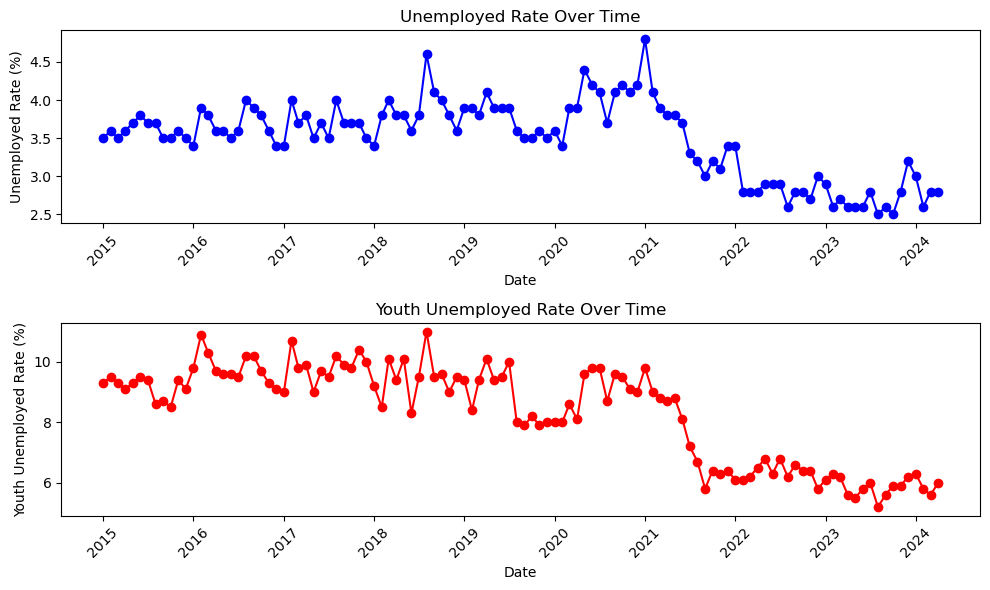

In [13]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 실업률 그래프
plt.subplot(2, 1, 1)
plt.plot(unemployed_rate['Date'],unemployed_rate['Unemplyed rate'], marker='o', linestyle='-', color='b')
plt.title('Unemployed Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployed Rate (%)')
plt.xticks(rotation=45)

# 청년 실업률 그래프
plt.subplot(2, 1, 2)
plt.plot(unemployed_rate['Date'], unemployed_rate['The youth unemplyed rate'], marker='o', linestyle='-', color='r')
plt.title('Youth Unemployed Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Youth Unemployed Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
unemployed_rate.set_index('Date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
unemployed_rate = unemployed_rate.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
unemployed_rate.reset_index(inplace=True)
unemployed_rate['Date'] = unemployed_rate['Date'].dt.strftime('%Y-%m-%d')

# 결과 출력
unemployed_rate

,Date,Unemplyed rate,The youth unemplyed rate
0,2015-01-01,3.5,9.3
1,2015-01-02,3.5,9.3
2,2015-01-03,3.5,9.3
3,2015-01-04,3.5,9.3
4,2015-01-05,3.5,9.3
...,...,...,...
3374,2024-03-28,2.8,5.6
3375,2024-03-29,2.8,5.6
3376,2024-03-30,2.8,5.6
3377,2024-03-31,2.8,5.6


In [17]:
unemployed_rate.to_csv('Unemployed_rate_cleaned.csv',index=False)